In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv('S1_Dataset/d1p01M', header=None)
df.columns = [
    'time',
    'frontal accel',
    'vertical accel',
    'lateral accel',
    'antenna id',
    'rssi',
    'phase',
    'frequency',
    'activity',
]
activities = {
    1: 'sit on bed',
    2: 'sit on chair',
    3: 'lying',
    4: 'ambulating',
}
df.replace({'activity': activities}, inplace=True)
df

,time,frontal accel,vertical accel,lateral accel,antenna id,rssi,phase,frequency,activity
0,0.00,0.27203,1.00820,-0.082102,1,-63.5,2.42520,924.25,sit on bed
1,0.50,0.27203,1.00820,-0.082102,1,-63.0,4.73690,921.75,sit on bed
2,1.50,0.44791,0.91636,-0.013684,1,-63.5,3.03110,923.75,sit on bed
3,1.75,0.44791,0.91636,-0.013684,1,-63.0,2.03710,921.25,sit on bed
4,2.50,0.34238,0.96229,-0.059296,1,-63.5,5.89200,920.25,sit on bed
...,...,...,...,...,...,...,...,...,...
396,251.00,0.87003,0.46851,0.009122,4,-58.5,0.73631,921.75,sit on bed
397,251.25,0.87003,0.46851,0.009122,1,-57.5,0.70870,923.25,sit on bed
398,251.50,0.87003,0.46851,0.009122,1,-59.0,0.25157,924.75,sit on bed
399,253.25,-0.00938,0.95081,-0.116310,1,-58.5,0.35282,924.25,sit on bed


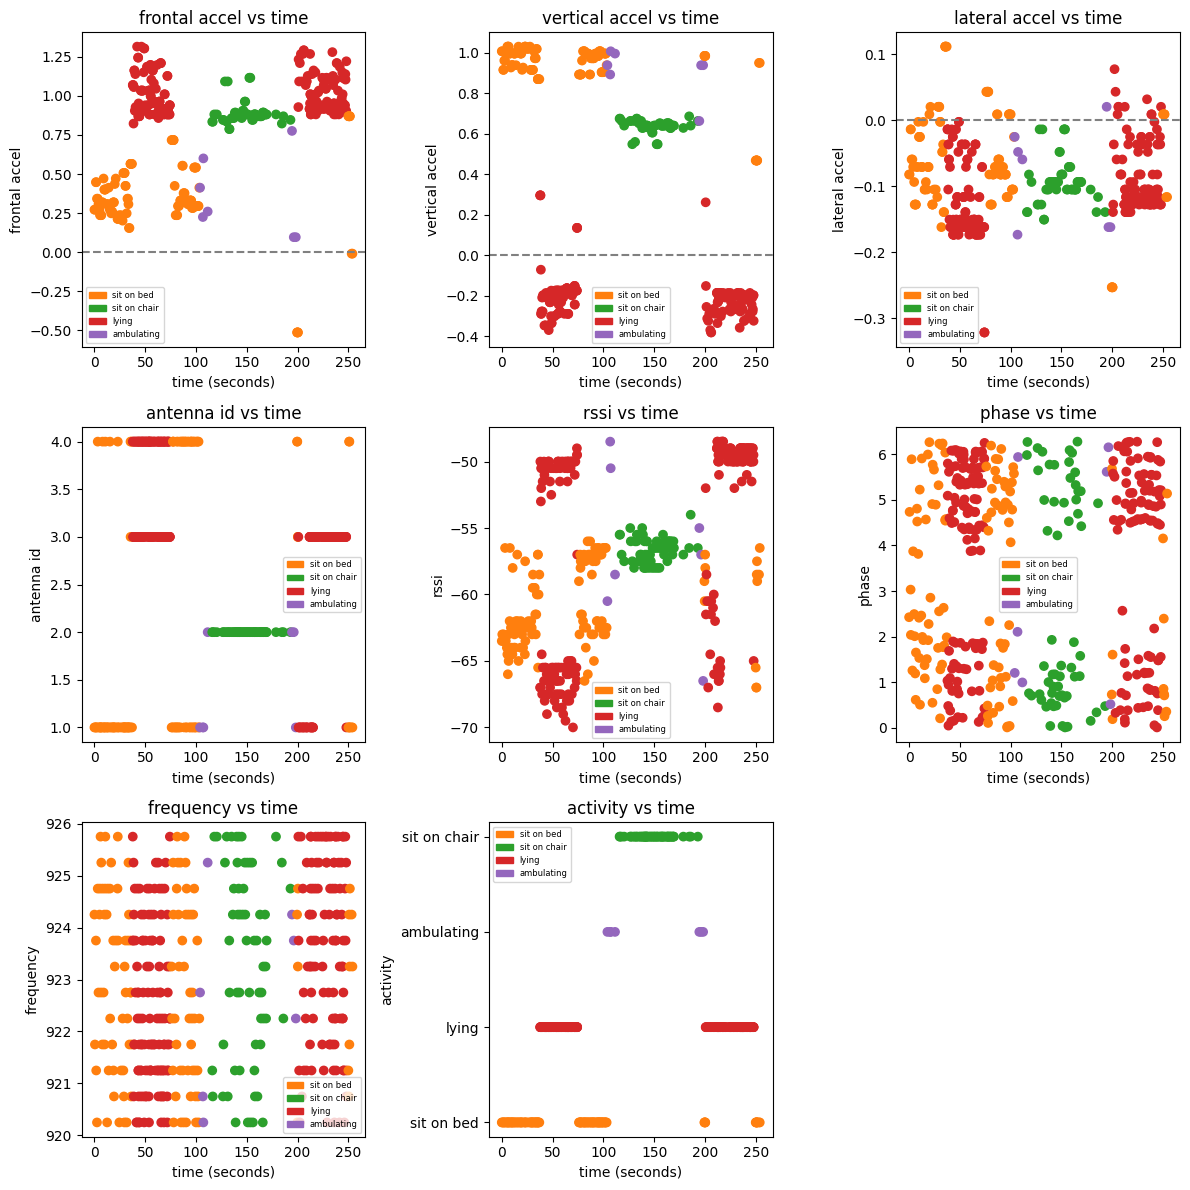

In [12]:
import matplotlib.patches as mpatches

colors = {
    'sit on bed': 'C1',
    'sit on chair': 'C2',
    'lying': 'C3',
    'ambulating': 'C4',
}

legend = [
    mpatches.Patch(color='C1', label='sit on bed'),
    mpatches.Patch(color='C2', label='sit on chair'),
    mpatches.Patch(color='C3', label='lying'),
    mpatches.Patch(color='C4', label='ambulating'),
]

plt.figure(figsize=(12, 12))

index = 0
for name in df.columns:
    if name == 'time':
        continue
    index += 1
    x = df['time']
    y = df[name]

    plt.subplot(3, 3, index)
    plt.scatter(x, y, c=df['activity'].map(colors))
    plt.title(f"{name} vs time")
    plt.xlabel('time (seconds)')
    plt.ylabel(name)
    plt.legend(handles=legend, fontsize=6)
    if 'accel' in name:
        plt.axhline(y=0, color='gray', linestyle='--')

plt.tight_layout()
plt.show()

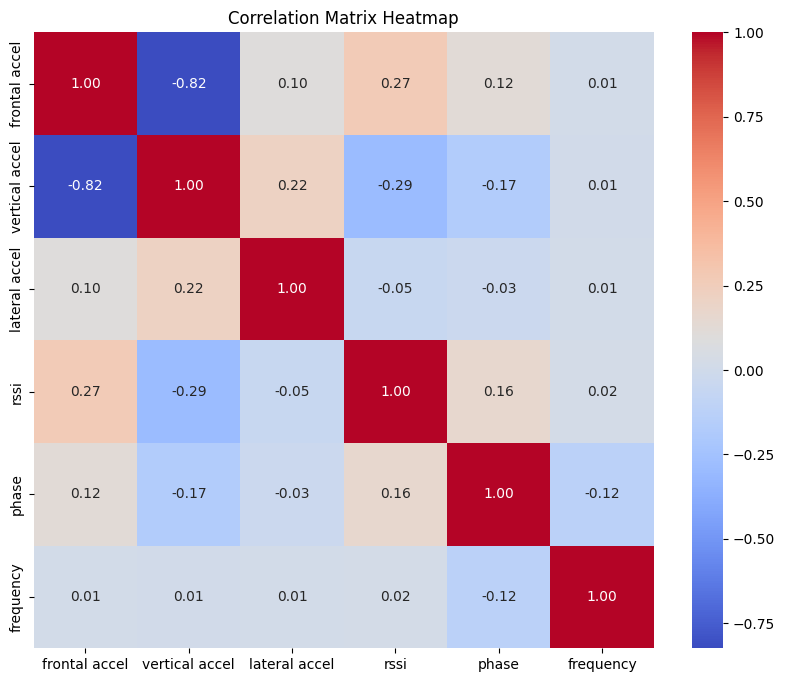

In [20]:
# Calculate correlation matrix
correlation_matrix = df.drop(columns=['time', 'antenna id', 'activity']).corr()

# Visualize correlation matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

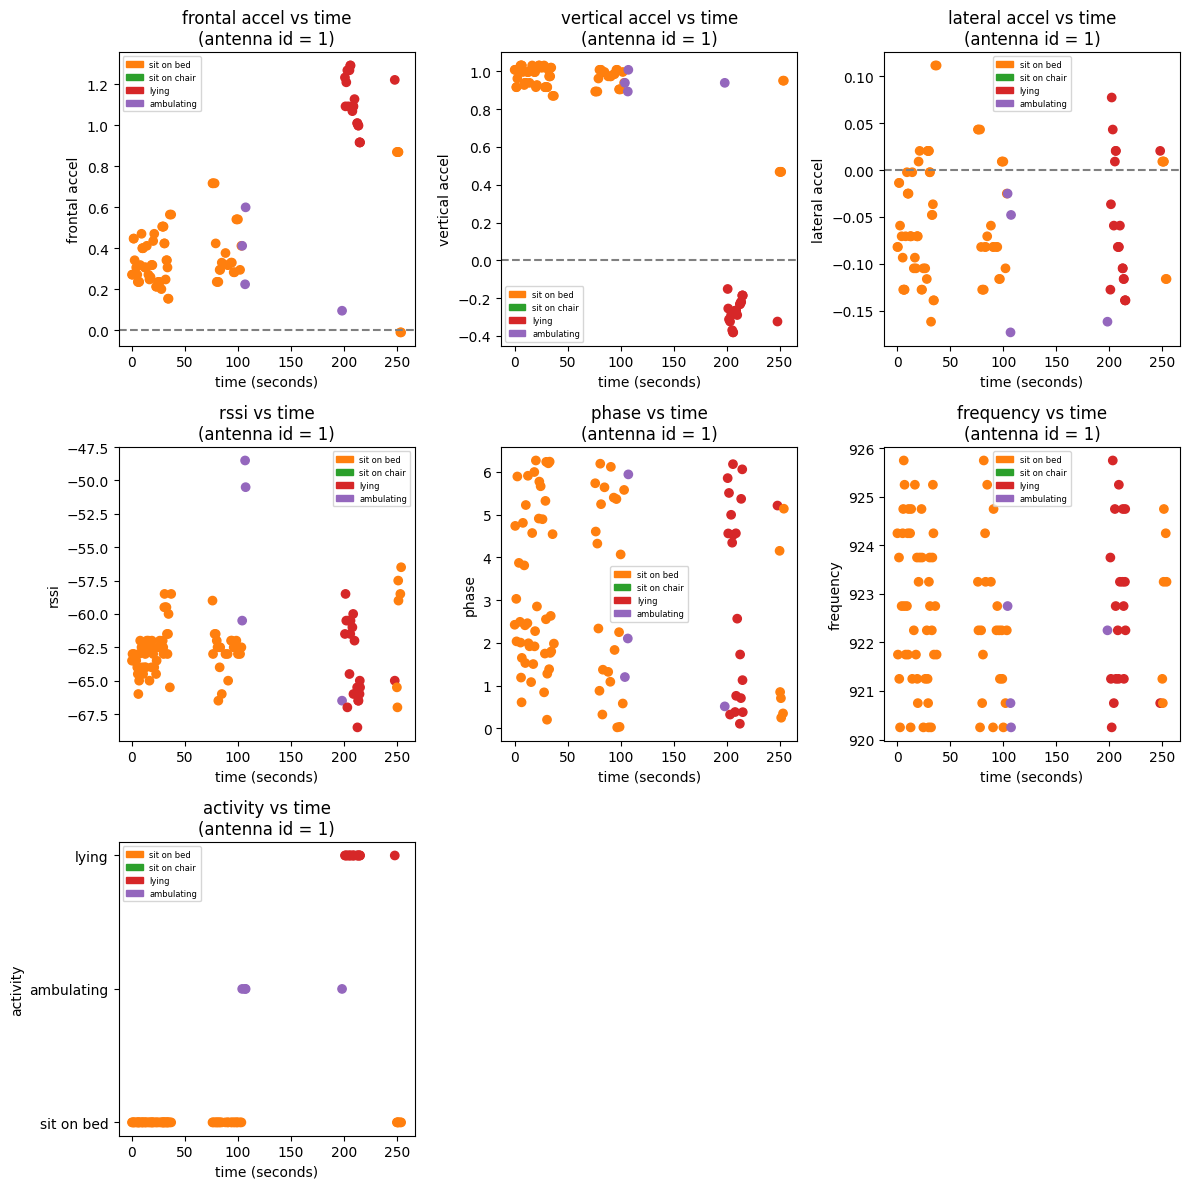

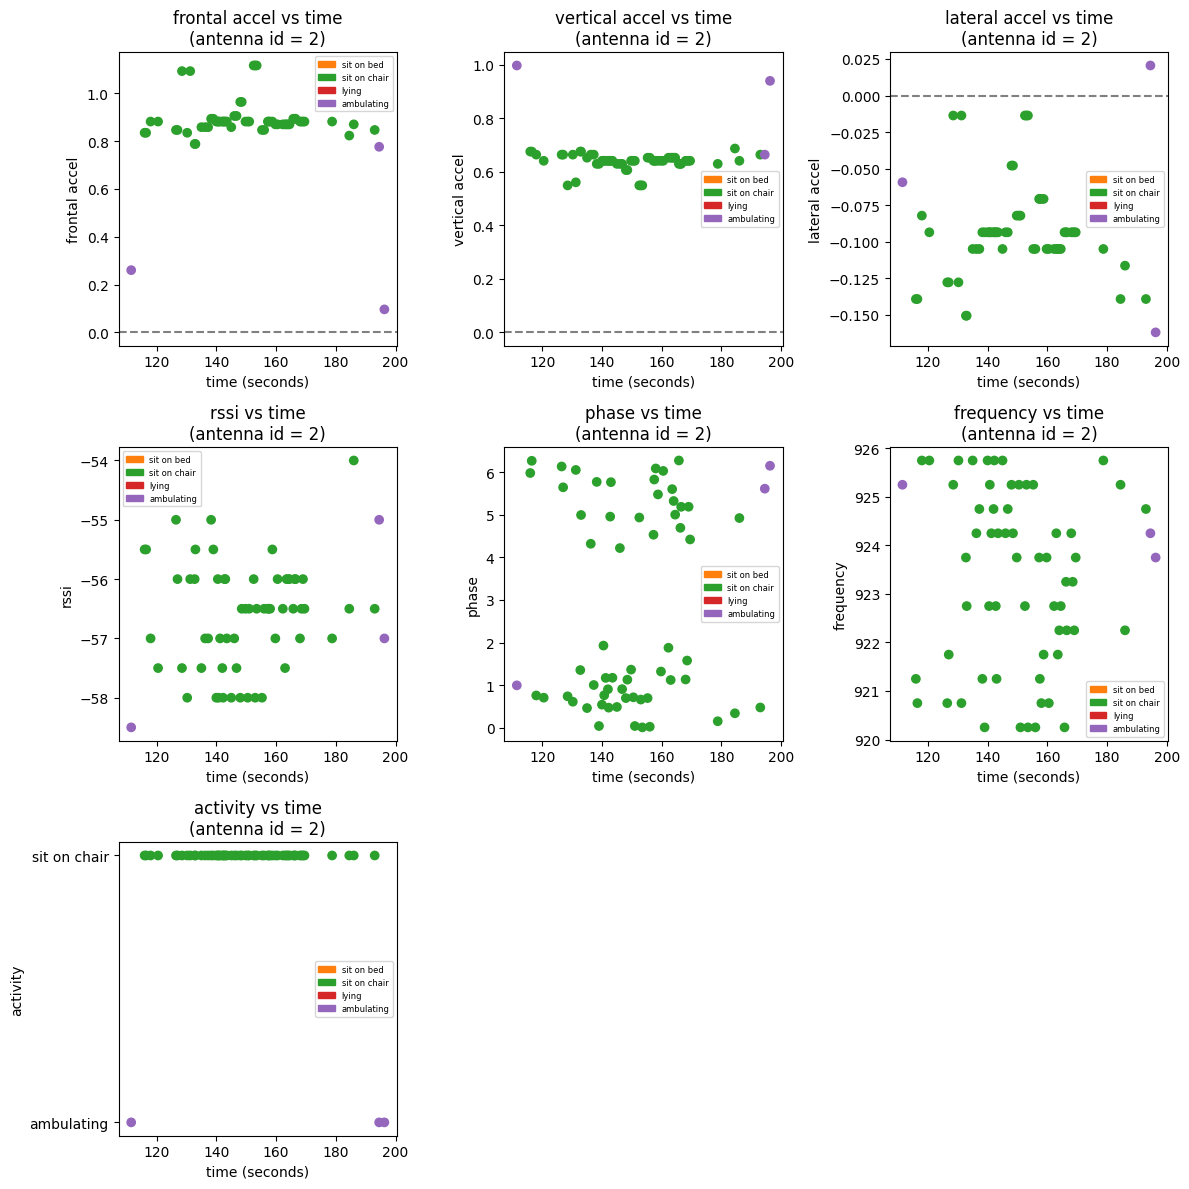

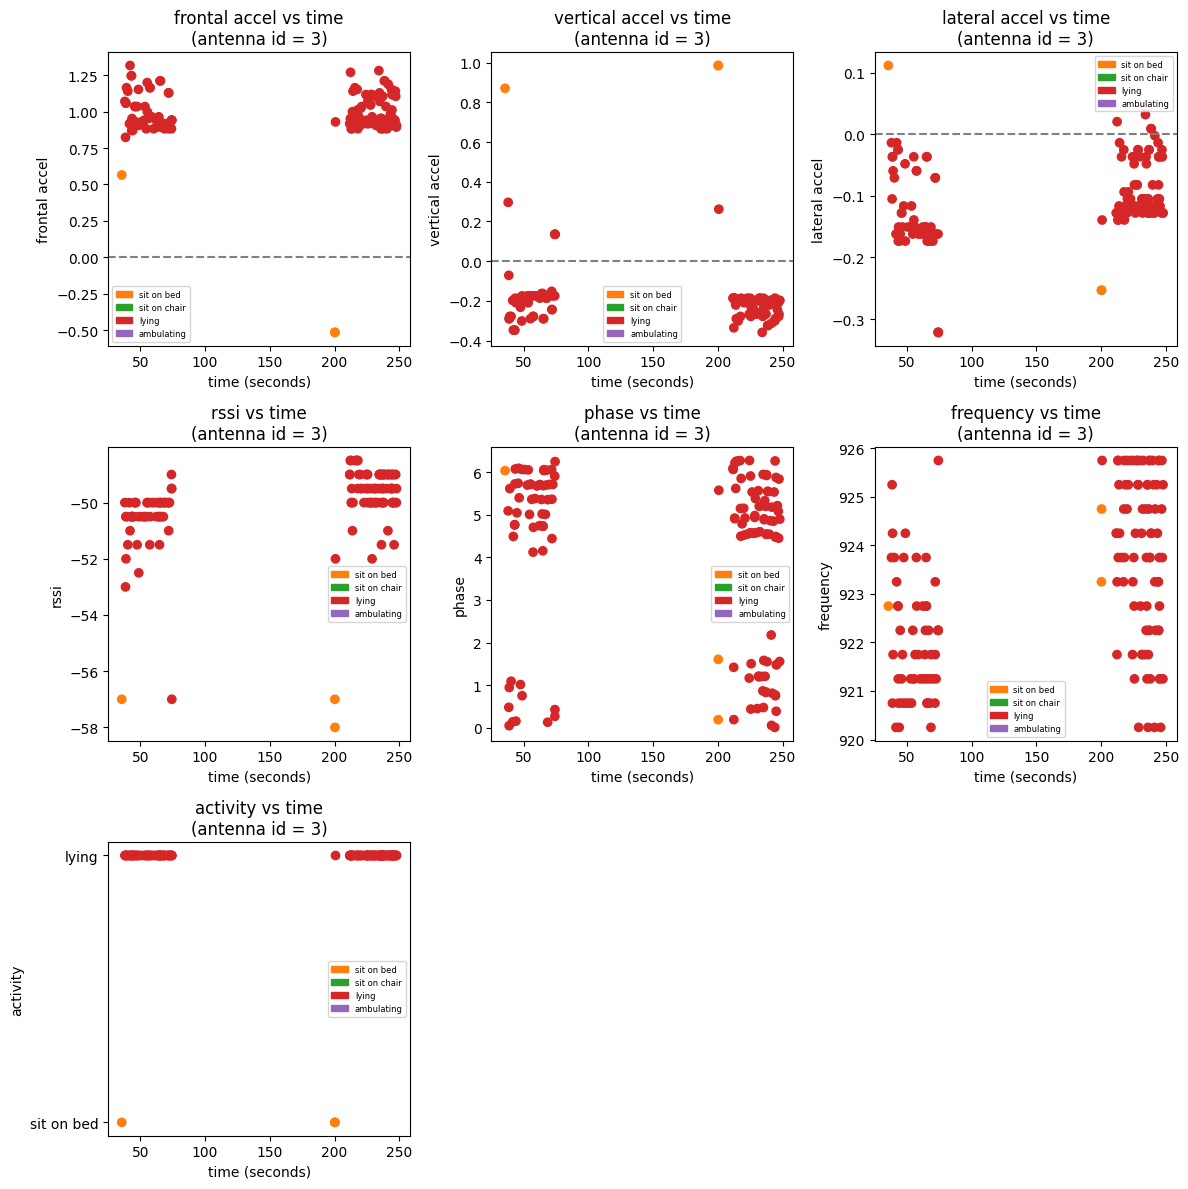

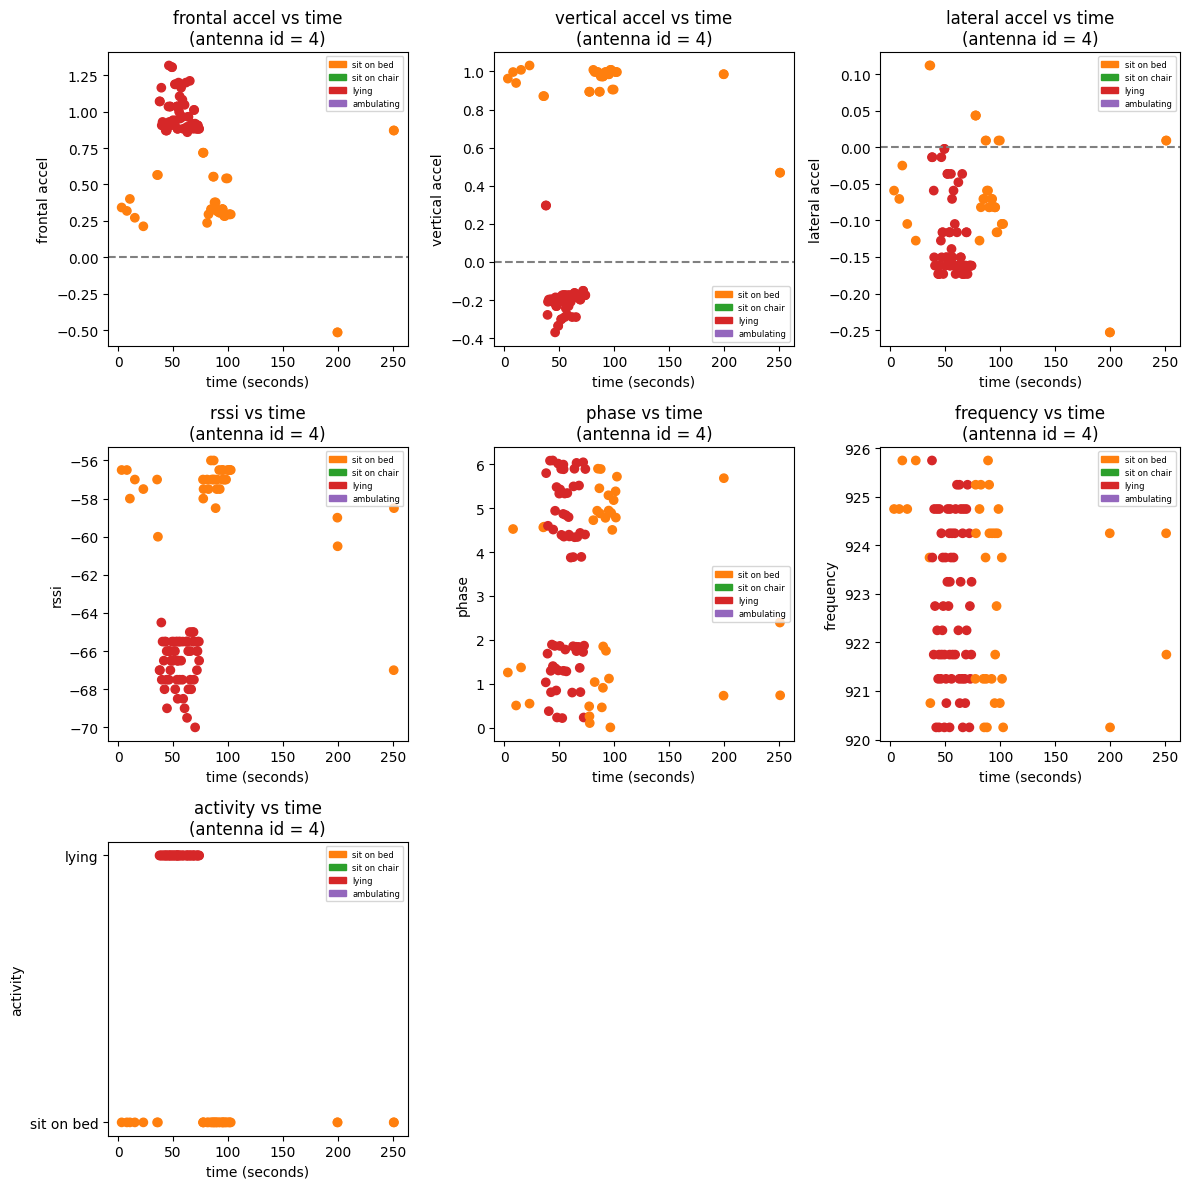

In [15]:
def plot_antenna(antenna_id):
    df2 = df.loc[df['antenna id'] == antenna_id]

    plt.figure(figsize=(12, 12))

    index = 0
    for name in df2.columns:
        if name in ['time', 'antenna id']:
            continue
        index += 1
        x = df2['time']
        y = df2[name]

        plt.subplot(3, 3, index)
        plt.scatter(x, y, c=df2['activity'].map(colors))
        plt.title(f"{name} vs time\n(antenna id = {antenna_id})")
        plt.xlabel('time (seconds)')
        plt.ylabel(name)
        plt.legend(handles=legend, fontsize=6)
        if 'accel' in name:
            plt.axhline(y=0, color='gray', linestyle='--')

    plt.tight_layout()
    plt.show()

plot_antenna(1)
plot_antenna(2)
plot_antenna(3)
plot_antenna(4)

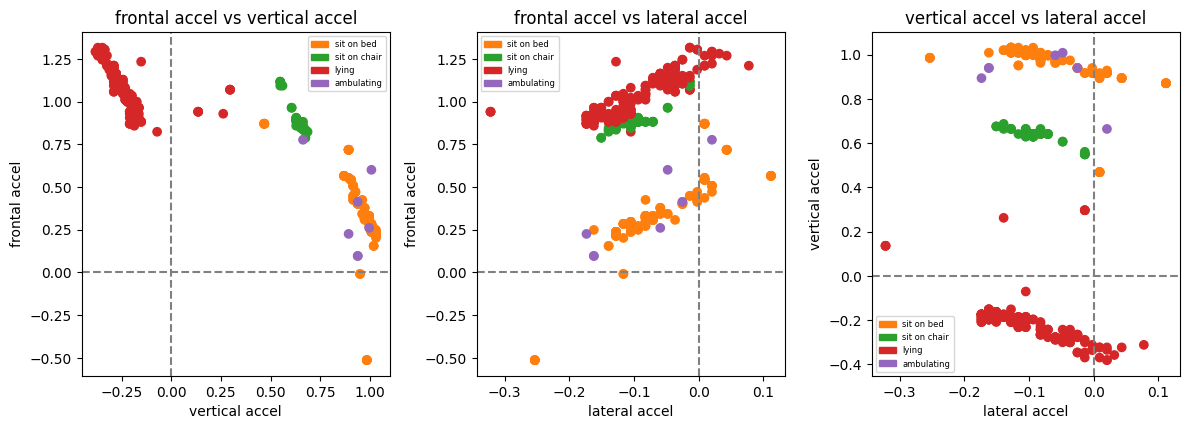

In [16]:
plt.figure(figsize=(12, 12))

# frontal vertical lateral

xname = 'vertical accel'
yname = 'frontal accel'
x = df[xname]
y = df[yname]
plt.subplot(3, 3, 1)
plt.scatter(x, y, c=df['activity'].map(colors))
plt.title(f"{yname} vs {xname}")
plt.xlabel(xname)
plt.ylabel(yname)
plt.legend(handles=legend, fontsize=6)
plt.axhline(y=0, color='gray', linestyle='--')
plt.axvline(x=0, color='gray', linestyle='--')

xname = 'lateral accel'
yname = 'frontal accel'
x = df[xname]
y = df[yname]
plt.subplot(3, 3, 2)
plt.scatter(x, y, c=df['activity'].map(colors))
plt.title(f"{yname} vs {xname}")
plt.xlabel(xname)
plt.ylabel(yname)
plt.legend(handles=legend, fontsize=6)
plt.axhline(y=0, color='gray', linestyle='--')
plt.axvline(x=0, color='gray', linestyle='--')

xname = 'lateral accel'
yname = 'vertical accel'
x = df[xname]
y = df[yname]
plt.subplot(3, 3, 3)
plt.scatter(x, y, c=df['activity'].map(colors))
plt.title(f"{yname} vs {xname}")
plt.xlabel(xname)
plt.ylabel(yname)
plt.legend(handles=legend, fontsize=6)
plt.axhline(y=0, color='gray', linestyle='--')
plt.axvline(x=0, color='gray', linestyle='--')

plt.tight_layout()
plt.show()

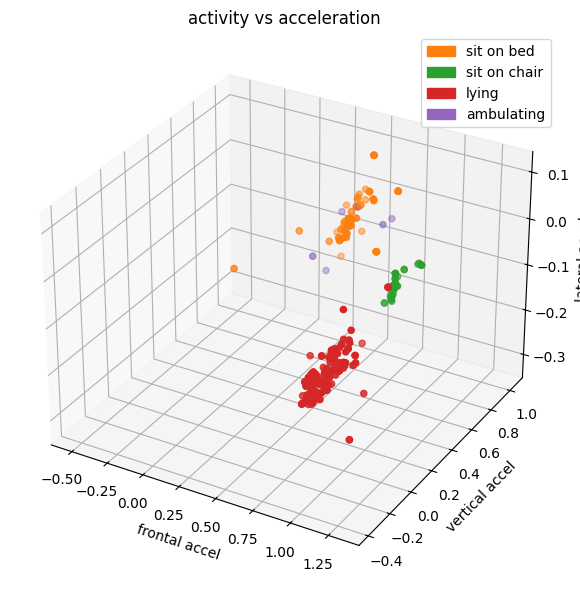

In [17]:
xname = 'frontal accel'
yname = 'vertical accel'
zname = 'lateral accel'
x = df[xname]
y = df[yname]
z = df[zname]
fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, c=df['activity'].map(colors))
ax.set_title(f"activity vs acceleration")
ax.set_xlabel(xname)
ax.set_ylabel(yname)
ax.set_zlabel(zname)
ax.legend(handles=legend)
plt.tight_layout()
plt.show()


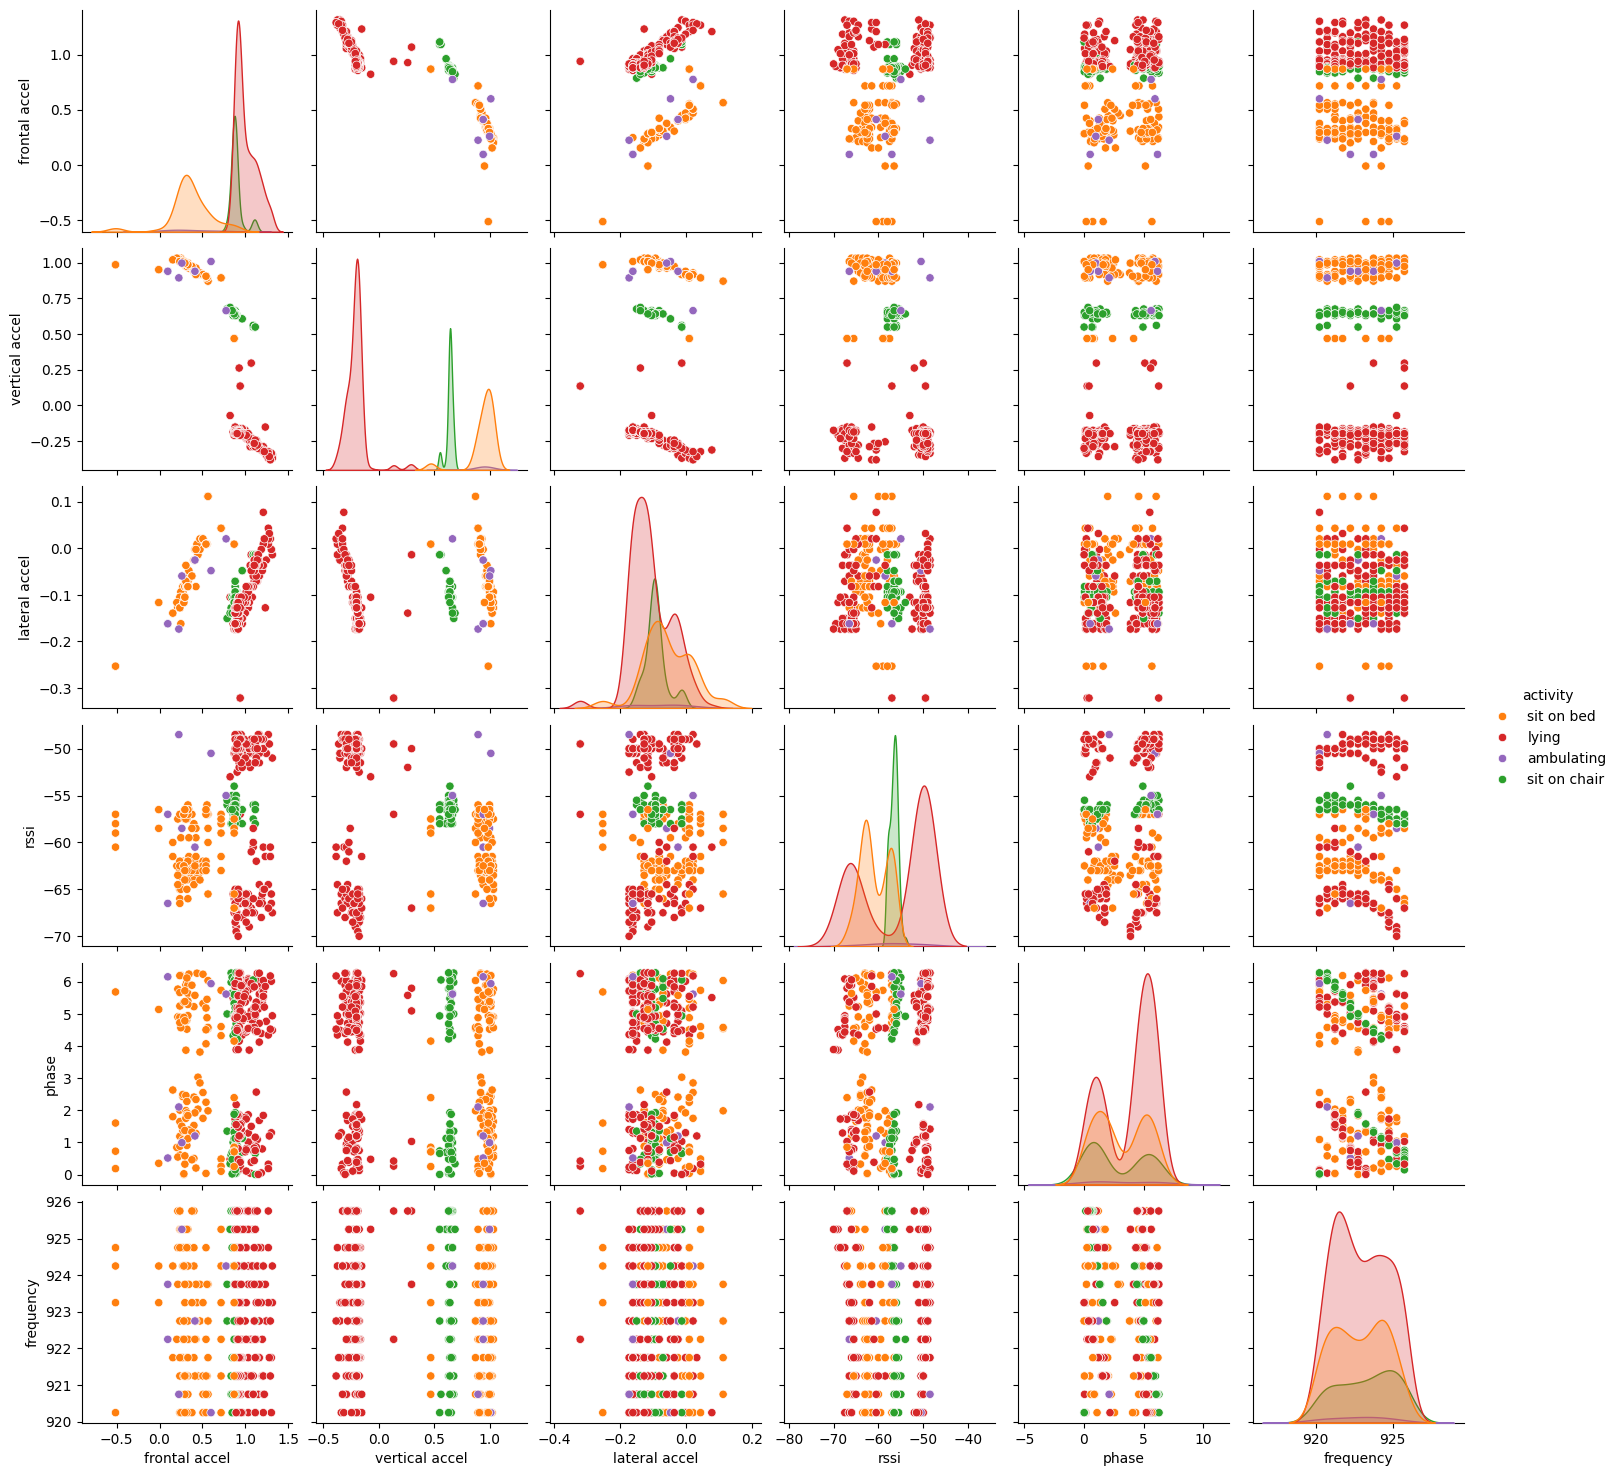

In [22]:
# Measure the relationships between different features
# Visualize relationships using scatter plots
sns.pairplot(df.drop(columns=['time', 'antenna id']), hue='activity', palette=colors)
plt.show()